<a href="https://colab.research.google.com/github/MaheshRavela/MaheshRavela/blob/main/Copy_of_Module_10_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Module 10 Recommender Systems in Python***

This module is going to show you how to build a recommender system using many of your Python and **pandas** skills that you have built over the last several weeks.

**Recommendation systems**, like ones used by Netflix, are algorithms designed to suggest items to users based on various factors. Using Netflix data as an example, these systems analyze a vast array of user data and movie ratings to provide personalized content suggestions.

There are three main types of recommendation systems:

- **Simple:** Offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.

- **Content Filtering:** Recommends items similar to what the user has liked in the past.

- **Collaborative Filtering:** Makes recommendations based on the likes and dislikes of similar users.


Below is a simplified visual of how a recommendation system works:

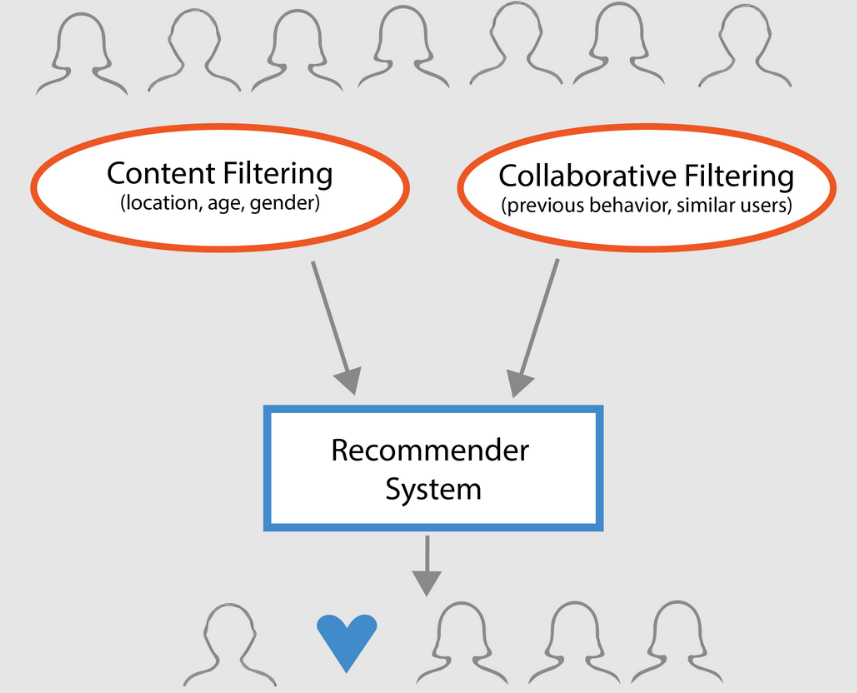

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Simple Recommenders***

As described in the previous section, simple recommenders are basic systems that recommend the top items based on a certain metric or score. In this section, you will build a simplified clone of IMDB Top 250 Movies using metadata collected from Netflix movies.

The following are the steps involved:

- Decide on the metric or score to rate movies on.

- Calculate the score for every movie.

- Sort the movies based on the score and output the top results.

In [7]:
#Import the libraries and data

# Import Pandas
import pandas as pd

# Import movies_metadata
movies_metadata = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv', low_memory=False)

# Print the first five rows
movies_metadata.head(7)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0


In [6]:
movies_metadata.shape

(45466, 24)

***The Problem with User Ratings***

Need a method to help balance the average rating of an item with the number of votes it has received, preventing items with a small number of high ratings from outranking items with a larger number of consistently good ratings.

Use a **weighted ranking** which is often used in recommendation systems to rank items.

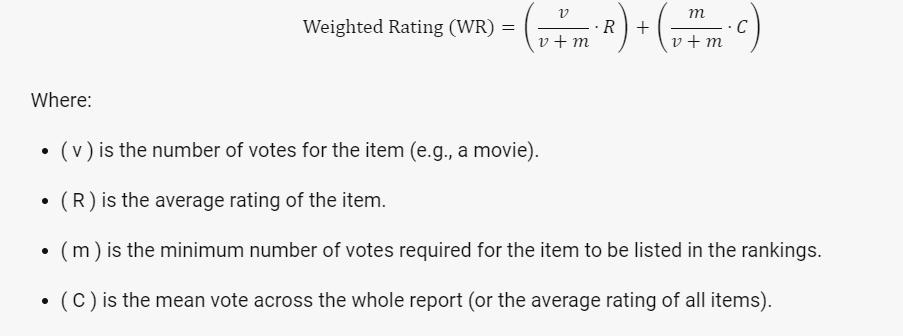

From the data we have *v* (vote_count) and *R* (vote_average). You can calculate C from the data.

Determining an appropriate value for *m* is a **hyperparameter** that you can choose accordingly since there is no right value for *m*. A **hyperparameter** if a value that you estimate from the data. You can consider it as a preliminary negative filter that will simply remove the movies which have a number of votes less than a certain threshold *m*. The selectivity of your filter is up to your discretion.

We will use cutoff *m* as the 90th percentile. In other words, for a movie to be considered, it must have more votes than at least 90% of the movies on the list. (On the other hand, if you had chosen the 75th percentile, you would have considered the top 25% of the movies in terms of the number of votes garnered. As percentile decreases, the number of movies considered will increase).


In [10]:
# Calculate mean of vote average column
C=movies_metadata['vote_average'].mean()
print(C)

#Average rating of a movie is 5.6 out of 10.

#Calculate the number of votes, m, received by a movie in the 90th percentile
# Calculate the minimum number of votes required to be in the chart, m
m=movies_metadata['vote_count'].quantile(0.90)
print(m)

#You have the m you can simply use a greater than equal to condition to filter
#out movies having greater than equal to 160 vote counts:

# Filter out all qualified movies into a new DataFrame
q_movies = movies_metadata.copy().loc[movies_metadata['vote_count'] >= m]
q_movies.shape



5.618207215134185
160.0


(4555, 24)

In [13]:
#Calculate the weighted rating for each qualified movie
#To do this, you will,
#1. Define a function, weighted_rating();
#2. Since you already have calculated m and C you will simply pass them as an argument to the function;
#3. Then you will select the vote_count(v) and vote_average(R) column from the q_movies data frame;
#4. Finally, you will compute the weighted average and return the result.

# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)




#Define a new column named score that will calculate the weighted_rating value
#for each movie (row) in the data frame of qualified movies
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies.head()

#sort the data frame in descending order based on the score column and output
#the title, vote count, vote average, and weighted rating (score) of the top10 movies
#Sort movies in descending order of their scores
q_movies = q_movies.sort_values('score', ascending=False)

#print the top 15 movies
#Sort movies based on score calculated above
q_movies.head(15)




,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
314,False,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,2.834147e+07,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.5,8358.0,8.445869
834,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,2.450664e+08,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0,8.425439
10309,False,NaN,13200000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,19404,tt0112870,hi,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",...,1.000000e+08,190.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Come... Fall In Love,Dilwale Dulhania Le Jayenge,False,9.1,661.0,8.421453
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,8.265477
2843,False,NaN,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,1.008538e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,Fight Club,False,8.3,9678.0,8.256385
